In [1]:
import pandas as pd
import numpy as np

In [2]:
label_dict={"no":0,"yes":1}

In [3]:
categories=["no","yes"]

In [4]:
labels=[0,1]

In [5]:
data_path="Brain_Tumor_Detection/"

In [6]:
import cv2,os

In [7]:
data=[]
target=[]

In [8]:
#Reading files from folder and storing the into list as data and thier label in list as target 

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try: 
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            pass

## PREPROCESSING

WORKING WITH IMAGE DATA

In [10]:
# Converting list to numpy array for easier and faster mathematical operations
data=np.array(data)

In [11]:
#Normalization of Data
data=data/255

In [22]:
data.shape

(3000, 100, 100)

In [23]:
#Reshaping the data showing Prescence of only sinlge colour channel or grayscale image
data=np.reshape(data,(data.shape[0],100,100,1)) 

In [25]:
data.shape[1:]

(100, 100, 1)

NOW WORKING WITH TARGET/LABEL DATA

In [26]:
#Conveting type of target from list to numpy array
target=np.array(target)
target.shape

(3000,)

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
new_target=to_categorical(target) #Converting the target into categorical data
new_target.shape

(3000, 2)

## BUILDING THE MODEL

IMPORTING NECESSARY LIBRARIES

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D

CREATING MODEL AND ADDING LAYERS

In [33]:
model = Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation="relu"))
model.add(Dense(2,activation='softmax'))

COMPILING THE MODEL

In [34]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [35]:
from sklearn.model_selection import train_test_split

SPLITIING THE DATA INTO TRAIN AND TEST

In [36]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

FITTING THE DATA AND DETERMINING THE ACCURACY OF THE MODEL

In [39]:
checkpoint=ModelCheckpoint("model-{epoch:03d}.model",save_best_only=True,mode="auto")
history=model.fit(train_data,train_target,epochs=20,validation_split=0.2,callbacks=[checkpoint])

Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 0.5261 - accuracy: 0.7370WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
60/60 [==============================] - 145s 2s/step - loss: 0.5261 - accuracy: 0.7370 - val_loss: 0.3524 - val_accuracy: 0.8583
Epoch 2/20
60/60 [==============================] - 132s 2s/step - loss: 0.3232 - accuracy: 0.8568 - val_loss: 0.2508 - val_accuracy: 0.9125
Epoch 3/20
60/60 [==============================] - 134s 2s/step - loss: 0.1972 - accuracy: 0.9234 - v

## TESTING MODEL ON TEST DATASET

In [56]:
import matplotlib.pyplot as plt

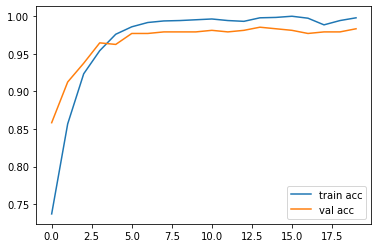

In [61]:
#accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('model-1.png')
plt.show()

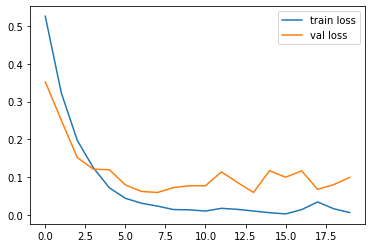

In [62]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('model.png')
plt.show()

In [63]:
model.evaluate(test_data,test_target,batch_size=32)

19/19 [==============================] - 10s 537ms/step - loss: 0.3125 - accuracy: 0.9667


[0.3125450015068054, 0.9666666388511658]

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
#predict
y_pred=model.predict(test_data)
y_pred=np.argmax(y_pred,axis=1)
test_target = np.argmax(test_target,axis=1)

In [75]:
#get classification report

print(classification_report(y_pred,test_target))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       288
           1       0.98      0.96      0.97       312

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [76]:
#get confusion matrix
print(confusion_matrix(y_pred,test_target))

[[281   7]
 [ 13 299]]
